<a href="https://colab.research.google.com/github/Sitaoooo/B20lab_sitao/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the California Housing dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target
# standardization subtracting the mean and dividing by the standard deviation
X = StandardScaler().fit_transform(X)
y = y.reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert NumPy arrays to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test)

In [3]:
# Linear Regression Model
class LR(nn.Module):
    def __init__(self, input_size):
        super(LR, self).__init__()
        # this defines a linear operation (i.e. a matrix with specified dimension)
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        # self.linear(x) will process x by the above defined linear operation
        # and calculate the output after the operation
        return self.linear(x)

# TODO: Neural Network: Please complete to finish Q1
class NN(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NN, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, 1)

    # TODO: fill the below function; torch.relu() is needed
    # The forward function defines how your model processes input data to produce an output.
    # This is where the actual computation of the model takes place,
    # applying operations defined in the constructor (__init__ method) to the input tensors.
    # To define an one hidden layer NN with relu activation,
    # you need to apply a linear transformation first, then apply relu activation;
    # then apply another linear transformation to produce the output.
    def forward(self, x):
        x = nn.functional.relu(self.layer1(x))
        return self.layer2(x)

def train_and_evaluate(model, X_train, y_train, X_test, y_test, learning_rate, num_epochs, lambda_reg=0.):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_losses = []
    test_losses = []

    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)

        l2_reg = torch.tensor(0.)
        for param in model.parameters():
            # requries_grad is a flag that shows whether
            # the gradients w.r.t the tensor are calculated or not.
            # If requires_grad is True it will mean that PyTorch will keep
            # of the gradient of the [output] w.r.t. the Tensor varaiable.
            if param.requires_grad and len(param.shape)>1 and param.shape[1]>1:
                l2_reg += torch.sum(param**2)

        # Total loss
        total_loss = loss + lambda_reg * l2_reg

        total_loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

        model.eval()
        with torch.no_grad():
            # We do not need to call the forward method directly.
            # Instead, we call the model object itself with the input data as an argument,
            # like so: output = model(input_tensor).
            # When you do this, PyTorch internally calls the forward method of your model with the input tensor.
            test_outputs = model(X_test)
            test_loss = criterion(test_outputs, y_test)
            test_losses.append(test_loss.item())

        if epoch % 100 == 0:
            print(f'Epoch {epoch}/{num_epochs}, Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

    return train_losses, test_losses


Q1. Please complete the above NN class. Your neural network should have a single hidden layer with Relu activation. Then train it by running the following block of code. You should see a learning curve looks like:

[click to open fig](https://drive.google.com/file/d/1VcCke3nC5mJrkKk255Jb5ffksagYBFPc/view?usp=sharing)

Epoch 0/500, Train Loss: 5.5283, Test Loss: 5.2967
Epoch 100/500, Train Loss: 0.7610, Test Loss: 0.7663
Epoch 200/500, Train Loss: 0.5786, Test Loss: 0.5919
Epoch 300/500, Train Loss: 0.4864, Test Loss: 0.5004
Epoch 400/500, Train Loss: 0.4408, Test Loss: 0.4535


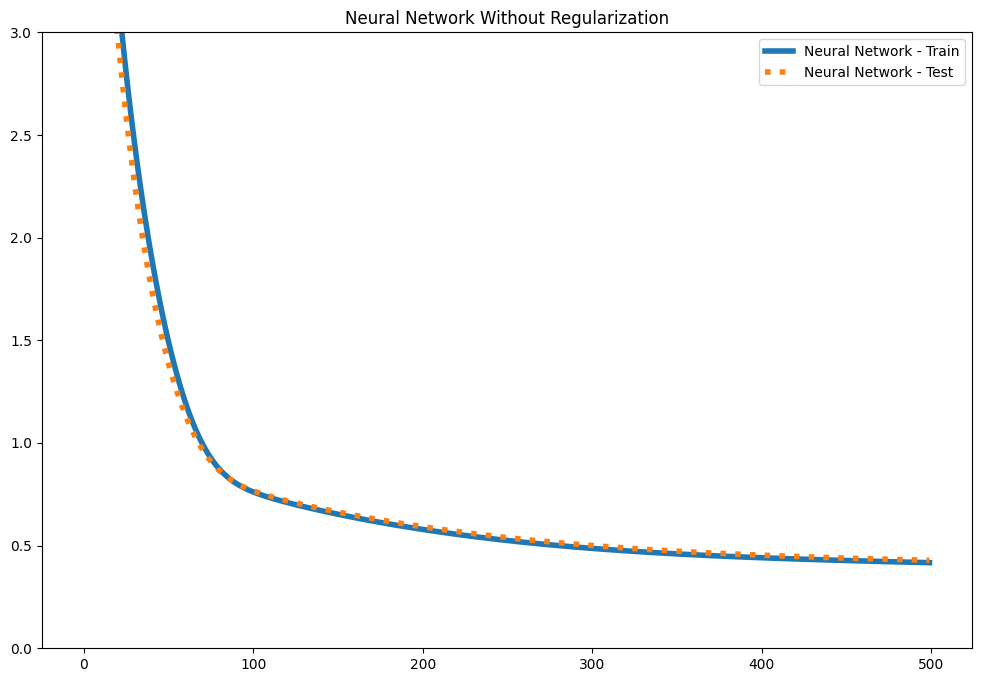

In [4]:
n_eps = 500

# Train and evaluate Neural Network without regularization
nn_model = NN(X_train.shape[1], hidden_size=128)
train_losses_nn, test_losses_nn = train_and_evaluate(nn_model, X_train_tensor, y_train_tensor,
                                                     X_test_tensor, y_test_tensor, learning_rate=0.001, num_epochs=n_eps)


# Setting the line width
line_width = 4

# Figure for Neural Network without Regularization
plt.figure(figsize=(12, 8))
plt.plot(train_losses_nn, label='Neural Network - Train', linestyle='-', linewidth=line_width)
plt.plot(test_losses_nn, label='Neural Network - Test', linestyle=':', linewidth=line_width)
plt.title('Neural Network Without Regularization')
plt.ylim(0, 3)
plt.legend()
plt.show()


Q2. You are given the following figure of learning curve, which is generated by one of the following settings (you can assume other settings such as NN size, minibatch size and optimizer are the same as above):

*   NN with learning rate $0.001$ with regularization weight 0.1
*   NN with learning rate $0.01$ without regularization
*   LR (linear regression) with learning rate $0.1$ without regularization
*   LR (linear regression) with learning rate $0.1$ with regularization weight 100
*   LR (linear regression) with learning rate $0.1$ with regularization weight 0.1

Try to guess which setting was used to get the figure. Why?

**Answer**: It is NN with LR = 0.001 with regularization weight 0.1, since both the given figure and the figure I obtained from previous NN model converge at around the same rate, suggesting a similar learning rate, both converge at around 0.5, whereas LR will have higher converged loss. However, since the given figure converged loss is slight above 0.5 whereas NN without regularization gives slightly below 0.5, suggesting that regularization loss is added to the model in the given figure

[click to open fig](https://drive.google.com/file/d/1jjuRIGOmT6M4KNQjMWNor_bdc0XEP7lu/view?usp=sharing)

Q3. Please add code below to train the guessed algorithm & hyperparameter setting. Make sure you can reproduce the above figure.

Epoch 0/500, Train Loss: 6.3037, Test Loss: 6.0405
Epoch 100/500, Train Loss: 0.9632, Test Loss: 0.9855
Epoch 200/500, Train Loss: 0.6144, Test Loss: 0.6435
Epoch 300/500, Train Loss: 0.5724, Test Loss: 0.5940
Epoch 400/500, Train Loss: 0.5639, Test Loss: 0.5815


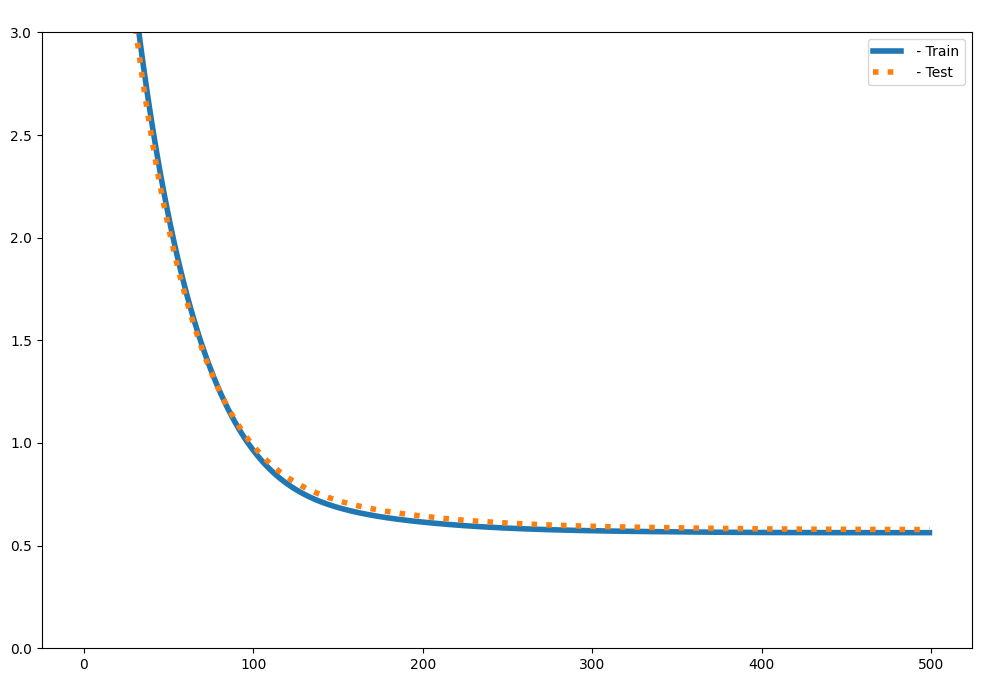

In [5]:
n_eps = 500

# TODO: Train and evaluate xxx, please fill the below and set learning rate, lambda reg.
model = NN(X_train.shape[1], hidden_size=128)
train_losses_nn, test_losses_nn = train_and_evaluate(model, X_train_tensor, y_train_tensor,
                                                     X_test_tensor, y_test_tensor, learning_rate=0.001 , num_epochs=n_eps, lambda_reg=0.1 )


# Setting the line width
line_width = 4

# Figure for learning curves of your algorithm
plt.figure(figsize=(12, 8))
plt.plot(train_losses_nn, label=' - Train', linestyle='-', linewidth=line_width)
plt.plot(test_losses_nn, label=' - Test', linestyle=':', linewidth=line_width)
plt.title(' ')
plt.ylim(0, 3)
plt.legend()
plt.show()

Q4. In the above train_and_evaluation function, within the second for loop. What do you think the purpose of the if condition len(param.shape)>1 and param.shape[1]>1 in **linear regression**? Why do we need it?

This is to avoid bias term being included in the l2 loss, since bias term will have only 1 dimension (layer 2) or axis 1 of dimension is 1 (the dimension is 2 for bias term in layer 1), while l2 loss is to penalized magnitude of weight only
